In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os, os.path

from rotation.timeseries import TimeSeries
aigrain_root = '/Users/tdm/aigrain_rotation'
aigrain_root = os.getenv('AIGRAIN_ROTATION', 
                        os.path.expanduser('~/aigrain_rotation'))

import logging
rootLogger = logging.getLogger()
rootLogger.setLevel(logging.INFO)
    

In [53]:
partable = pd.read_table('{}/par/final_table.txt'.format(aigrain_root),
                        delim_whitespace=True)

In [60]:
def true_P(i):
    return partable.ix[i, ['PEQ', 'P_MIN', 'P_MAX']]

In [61]:
true_P(9)

PEQ      31.490000
P_MIN    32.425915
P_MAX    35.918658
Name: 9, dtype: float64

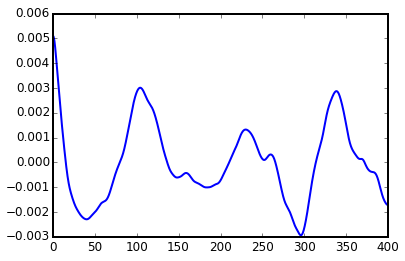

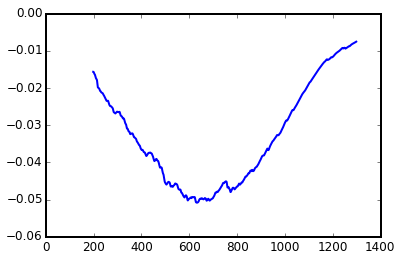

In [62]:
i = 9
datafile = '{}/noise_free/lightcurve_{:04.0f}.txt'.format(aigrain_root,i)
t,f = np.loadtxt(datafile, unpack=True)

s = TimeSeries(t,f, default_maxlag_days=400, flatten_order=4)
try:
    s.plot_acorr(mark_period=False)
except:
    logging.error('Acorr breaks.', exc_info=True)
plt.figure()
plt.plot(s.t,s.f);

In [16]:
s.make_chunks(7)

In [17]:
s.save_hdf('test1.h5')

ValueError: arrays must all be same length

DEBUG:root:maxes: [[  2.45000000e+01   9.81730455e-03]
 [  8.37083333e+01   3.53790956e-03]] (shape=(2, 2))
DEBUG:root:mins: [[  5.57375000e+01  -8.45244037e-03]
 [  9.39166667e+01  -1.29806584e-03]] (shape=(2, 2))
DEBUG:root:first extremum is a max; removing
DEBUG:root:now, maxes: [[  8.37083333e+01   3.53790956e-03]]
DEBUG:root:now, mins: [[  5.57375000e+01  -8.45244037e-03]
 [  9.39166667e+01  -1.29806584e-03]]
DEBUG:root:lphs: [ 0.00841316]
DEBUG:root:maxes: [[  2.53166667e+01   1.46652028e-02]
 [  4.13437500e+01   3.29450799e-03]
 [  5.59416667e+01   4.56064177e-03]
 [  6.89062500e+01  -3.60411292e-03]
 [  9.37125000e+01   1.19135538e-02]] (shape=(5, 2))
DEBUG:root:mins: [[  1.04125000e+01  -1.41097733e-02]
 [  3.46062500e+01  -3.14536301e-04]
 [  4.83875000e+01  -3.48383336e-04]
 [  6.64562500e+01  -3.81744704e-03]
 [  7.95229167e+01  -1.56693234e-02]] (shape=(5, 2))
DEBUG:root:last extremum is a max; removing
DEBUG:root:now, maxes: [[  2.53166667e+01   1.46652028e-02]
 [  4.1343

ValueError: cannot convert float NaN to integer

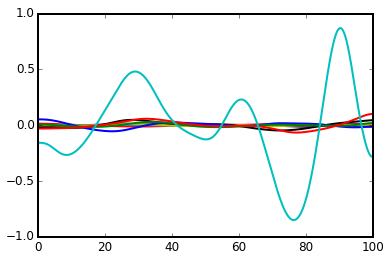

In [6]:
for sub in [s.subseries['sub{}'.format(i+1)] for i in range(len(s.subseries))]:
    sub.plot_acorr()

In [99]:
def fake_data(period=30, cadence=0.02,
             poly_coeffs=(5e-6,3e-5,0)):
    ts = np.arange(200,1300,cadence)
    fs = np.sin(2*np.pi*ts/(period))
    fs += np.polyval(poly_coeffs,ts)
    fs -= fs.mean()
    return ts, fs

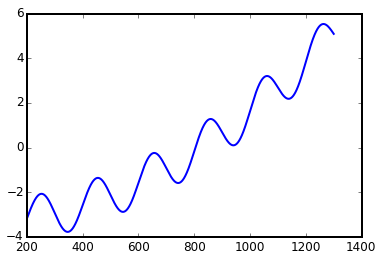

In [100]:
plt.plot(*fake_data(200))

55000

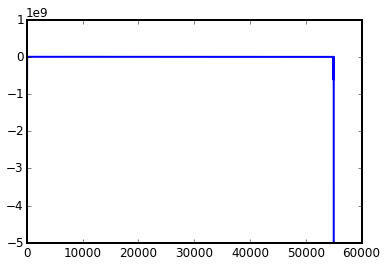

In [103]:
from numpy.fft import fft, ifft, fftfreq
t,f = fake_data()
ft = fft(f)
plt.plot(ft**2)
len(ft)

In [104]:
fftfreq?

In [109]:
x = 7
print 'this is the value of x: %.3f' % x
print 'this is also x: {:.3f}'.format(x)

this is the value of x: 7.000
this is also x: 7.000


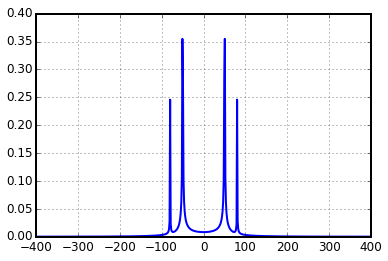

In [114]:
from numpy.fft import fft, fftfreq, fftshift
# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
#xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
#plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.grid()
plt.show()